# ML-Fundamentals - Evaluation Metrics

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-Modules)
* [Exercises](#Exercises)
 * [Confusion Matrix](#Confusion-Matrix)
 * [Accuracy](#Accuracy)
 * [Recall, Precision, Specificity and Fall-Out](#Recall,-Precision,-Specificity-and-Fall-Out)
 * [Balanced Accuracy](#Balanced-Accuracy)
 * [F1-Score](#F1-Score)
 * [ROC](#ROC)
 * [Kappa-Score](#Kappa-Score)
* [Summary and Outlook](#Summary-and-Outlook)
* [Literature](#Literature) 
* [Licenses](#Licenses)

## Introduction

Building a model to predict continuous values (e.g. the temperature) or membership of a class is only useful for real world problems when we can measure how good (or bad) our model's predictions are. Therefore in this notebook, you will get to know (and implement) the most basic concepts of evaluating machine-learning models. 

## Requirements
### Knowledge

You should have a basic knowledge of:
- numpy

Suitable sources for acquiring this knowledge are:
- [numpy quickstart](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [numpy slicing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)

### Python Modules

By [deep.TEACHING](https://www.deep-teaching.org/) convention, all python modules needed to run the notebook are loaded centrally at the beginning. 


In [1]:
# External Modules
import numpy as np
import hashlib
import matplotlib.pyplot as plt

In [2]:
def round_and_hash(value, precision=4, dtype=np.float32):
    """ 
    Function to round and hash a scalar or numpy array of scalars.
    Used to compare results with true solutions without spoiling the solution.
    """
    rounded = np.array([value], dtype=dtype).round(decimals=precision)
    hashed = hashlib.md5(rounded).hexdigest()
    return hashed

## Exercises

Hint: Implement all exercises in pure numpy.

### Confusion Matrix

A confusion matrix is often used in binary classification tasks where we only have 2 classes (positive, negative), but it can also be constructed when we have more classes. The green elements mark the cells with correct classifications, e.g., the cell "true positives" contains the number of examples with label positive (class) that are classified correctly as positives.  
For the multi classification problem, in some cases the classes can be more similar to one another (e.g. _C1_ might less different to _C2_ than to *C3*), which here is indicated by the intensity of the red color. 

![internet connection needed](https://gitlab.com/deep.TEACHING/educational-materials/raw/master/media/klaus/medical-image-classification/conf_matrix.png)

The variable `y_pred` holds the labels for 20 predicted examples. The variable `y_true` contains the true labels. A `1` means *positive*, `0` means *negative*. If the first element in `y_pred` and the first element in `y_true` is both `1`, it is a *true positive* and so on...

**Task:**

Implement the function to calculate the confusion matrix for given data. You function should return a 2D-matrix:

- `conf_matrix[0,0]` should contain the number of _true positives_
- `conf_matrix[1,1]` should contain the number of _true negatives_
- `conf_matrix[1,0]` should contain the number of _false negatives_
- `conf_matrix[0,1]` should contain the number of _false positives_

In [3]:
dataset_size = 20

### use this for random data
#y_pred = np.random.random_integers(low=0, high=1, size=dataset_size)
#y_true = np.random.random_integers(low=0, high=1, size=dataset_size)

### use this for fixed data (can be automatically evaluated with assertions)
y_pred = np.array([+1, +1, -0, -0, +1, +1, -0, +1, -0, +1, -0, -0, +1, +1, +1, -0, +1, -0, -0, -0])
y_true = np.array([-0, +1, +1, -0, -0, -0, -0, -0, -0, +1, +1, -0, -0, -0, +1, +1, -0, -0, -0, +1])

print(y_pred)
print(y_true)

[1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0]
[0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1]


In [4]:
def get_confusion_matrix_2_classes(y_pred, y_true):
    conf = np.ndarray([2,2], dtype=np.int32)
    ### Your implementation here
        
    return conf

In [5]:
### Solution
def get_confusion_matrix_2_classes(y_pred, y_true):
    conf = np.ndarray([2,2], dtype=np.int32)
    
    tp = y_true[(y_pred == 1) & (y_true == 1)]
    conf[0,0] = len(tp)
    
    tn = y_true[(y_pred == -0) & (y_true == -0)]
    conf[1,1] = len(tn)
    
    fp = y_true[(y_pred == 1) & (y_true == 0)]
    conf[0,1] = len(fp)
    
    fn = y_true[(y_pred == 0) & (y_true == 1)]
    conf[1,0] = len(fn)
    
    return conf

In [6]:
conf_matrix = get_confusion_matrix_2_classes(y_pred, y_true)
print(conf_matrix)
print(np.array([['tp', 'fp'], ['fn', 'tn']]))

[[3 7]
 [4 6]]
[['tp' 'fp']
 ['fn' 'tn']]


In [7]:
round_and_hash(conf_matrix)

'52ca17a7de673a7e78903f6a8ea91a0c'

In [8]:
assert round_and_hash(conf_matrix) == '52ca17a7de673a7e78903f6a8ea91a0c'

#### Sidenote

A confusion matrix contains nearly all relevant information about the predictions our model has made. However comparing two or more confusion matrices of different models directly is hardly practical. Especially for human readability / interpretability it is necessary to withdraw unnecessary information. The rest of this notebook is about metrics, which are directly comparable.

### Accuracy

Probably the most intuitive metric is the accuracy. The accuracy specifies what percentage of our predictions are correct.

For two classes:

$$
accuracy = \frac{tp + tn}{tp + tn + fp + fn}
$$

And in the general case with $n$ classes:

$$
accuracy = \frac{\sum_{i=1}^n h_{ii}}{\sum_{i=1}^n\sum_{j=1}^n h_{ij}}
$$

**Task:**

Implement the function to calculate the accuracy for the *two class case*, based on the confusion matrix.

*Optional*:

Implement your function to be able to process confusion matrices with $n$ classes, with $n \ge 2$

In [9]:
def calc_accuracy(conf_matrix):
    
    nenner = 0
    zaehler = 0
    
    for i in range (len(conf_matrix)):
        nenner = nenner + conf_matrix[i][i]
        for j in range (len(conf_matrix)):
            zaehler = zaehler + conf_matrix[i][j]
        

    return nenner/zaehler
    
    raise NotImplementedError()

#### Sidenote

Although the accuracy is very intuitive it might not be suitable for all classification tasks. Problems are:
- Unbalanced classes. Class A has 1.000 times more examples than class B. A model which just classifies everything as Class A not even looking at any features reaches 99.9% accuracy but you can hardly even call it a machine-learning model.
- When misclassification of a true-class-B sample as class A has severe consequences. Let class A be fish in the water and class B naval mines. When you are in a submarine, you'd want a naval mine detector to identify as many true mines as mines as possible. As a trade-off it may predict more fish as mines and achieve only 95% accuracy.

In [10]:
accuracy = calc_accuracy(conf_matrix=conf_matrix)
print(accuracy)

assert round_and_hash(accuracy) == 'eaff9b69a66af6d38e881cfcce709153'

0.45


### Recall, Precision, Specificity and Fall-Out

The following metrics set a specific field of a binary class confusion matrix in relation to another field. They can be hard to memorize, but the picture might help with that.

#### Acronyms:

- Recall $\frac{TP}{TP + FN}$: 
    - _sensivity, hit rate, true positive rate (**TPR**)_
- Precision $\frac{TP}{TP +FP}$:
    - _positive predictive velue (**PPV**)_
- Specificity $\frac{TN}{TN + FP}$:
    - _selectivity, true negative rate (**TNR**)_
- Fall-out $\frac{FP}{FP +TN}$:
    - _false positive rate (**FPR**)_

![internet connection needed](https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/klaus/tpr_tnr_ppv_fpr_smaller.png)

The other combinations _negative predictive value (NPV) $\frac{TN}{TN + FN}$_, *false negative rate (FNR)* $\frac{FN}{FN +TP}$, *false discovery rate* (**FDR**) $\frac{FP}{FP + TP}$ and *false omission rate (**FOR**)* $\frac{FN}{FN + TN}$  also exist, but the four mentioned in the heading and especially **recall** and **precision** are the ones mostly used.

### Balanced Accuracy

Balanced accuracy should be favoured, when classes are unbalanced. It is calculated with:

$$
accuracy_{balanced} = \frac{TPR + TNR}{2}
$$

**Task:**

Consider the confusion matrix with `fish_and_mines_prediction`, which classifies all objects as fish (negative) and does not detect the mine (positive) as a mine (false negative).
 
Implement the method to calculate $accuracy_{balanced}$.
- What is the value for the accuracy?
- What is the value for the balanced accuracy?

In [11]:
fish_and_mines_prediction = np.array([[1,0],[1,999]])
print(fish_and_mines_prediction)

[[  1   0]
 [  1 999]]


In [12]:
def calc_balanced_accuracy(conf_matrix):
    tpr = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])
    tnr = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])
    return (tpr + tnr)/2
    raise NotImplementedError()

In [13]:
acc = calc_accuracy(fish_and_mines_prediction)
print('accuracy: ', acc)
balanced_acc = calc_balanced_accuracy(fish_and_mines_prediction)
print('balanced accuracy: ', balanced_acc)

assert round_and_hash(balanced_acc) == '028aa23bdcb0575befa15321df88425e'

accuracy:  0.999000999000999
balanced accuracy:  0.75


### F1-Score

Another well known measure is the F1-Score (also F-Score / F-Measure). It is defined as:

$$
F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}
$$

**Task:**

- Implement the method to calculate the F1-Score
- What is the F1-Score for `fish_and_mines_prediction` for class *mine* as positive class?
- What is the F1-Score if we consider *fish* as positive class?
    - For this task also implement the function to reverse the positives and negatives of a confusion matrix
        - Do not reverse the matrix in-place. Create a new one and return it.

In [14]:
def calc_f1_score(conf_matrix):
    tpr = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])
    tnr = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])
    return 2*(tpr * tnr)/(tpr + tnr)
    raise NotImplementedError()
    
def reverse_pos_and_neg_of_conf_matrix(conf_matrix):
    switched_matrix = np.array([[conf_matrix[1][1],conf_matrix[1][0]],[conf_matrix[0][1],conf_matrix[0][0]]])
    print(switched_matrix)
    return switched_matrix
    raise NotImplementedError()

In [15]:
f1score_mine = calc_f1_score(fish_and_mines_prediction)
print(f1score_mine)

assert round_and_hash(f1score_mine) == '6602c18aac262cc65614adb27ed43b2d'

0.6666666666666666


In [17]:
fish_and_mines_reverse = reverse_pos_and_neg_of_conf_matrix(fish_and_mines_prediction)
f1score_fish = calc_f1_score(fish_and_mines_reverse)
print(f1score_fish)



[[999   1]
 [  0   1]]
0.6666666666666666


### ROC

In binary classification, many models predict the probability of the positive class. Typically, the threshold to classify an example as positive is 0.5, i.e., if the predicted probability is larger then the threshold the example is classified as positive.   
In the left-upper plot, the predicted probability density of the two (ground truth) classes are plotted. The left gaussian-shaped curve is the predicted probability density of the (true) negative class (ground truth). The right gaussian-shaped curve is the predicted probability density of the (true) positive  class (ground truth). The dashes vertical line corresponds to the threshold.
If the threshold is increased (shifted to right) the ratio of true positives to the sum of true positives plus false negatives (positive predicted) increases. That increases the *precision* of the classification but the *recall* drops. 

If the threshold is decreased (shifted to the left) the number of true positives and false negative increases such that the ratio of true positives to the sum of true positives plus false negatives (positive predicted) decreases.
For our example with the fish and mines: Adjusting the treshold to correctly find all true mines, will most likely also have the consequence, that some fish will also be predicted as mines.

The Receiver-Operating-Characteristic-Curve is a method to visualize this. To do so, you adjust the threshold from 0 to 1 and predict the FPR and TPR. If your resulting curve is a straight line from the bottom left to the top right, then your model predicts completely random, which is the worst case. The better your model is, the higher the slope at the beginning.

![internet connection needed](https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/klaus/ROC_explanation.png)
Picture inspired by \[SHA15\]

#### AUC

To summarize the ROC in a single number (in order to compare model), you calculate the Area-Under-The-Curve (AUC), which will be a value between 0.0 and 1.0. Though 0.5 is the worst (random predictions) model. A value less then 0.5 most likely means, you just accidentally switched some numbers.

**Task:**

Implement the method to calculate the ROC value. Assume we have 3 matrices which corresponds to three threshold values. The resulting plot should look similar to the picture above.

In [18]:
def calc_roc_value(conf_matrix):
    tpr = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])
    fpr = conf_matrix[0][1] / (conf_matrix[1][1] + conf_matrix[0][1])
    return (tpr, fpr)
    raise NotImplementedError()
    

In [19]:
cm1 = np.array([[1,1],[99,99]])
cm2 = np.array([[60,40],[40,60]])
cm3 = np.array([[99,99],[1,1]])
cm1_roc = calc_roc_value(cm1)
cm2_roc = calc_roc_value(cm2)
cm3_roc = calc_roc_value(cm3)

tprs = [cm1_roc[0], cm2_roc[0], cm3_roc[0]]
fprs = [cm1_roc[1], cm2_roc[1], cm3_roc[1]]
print(tprs)
print(fprs)

[0.01, 0.6, 0.99]
[0.01, 0.4, 0.99]


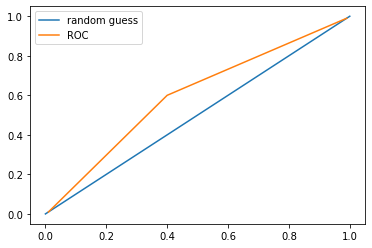

In [20]:
plt.plot(np.linspace(0,1),np.linspace(0,1), label='random guess')
plt.plot(fprs, tprs, label='ROC')
plt.legend()

In [21]:
tpr, fpr = calc_roc_value(fish_and_mines_prediction)
print(tpr, fpr)

assert round_and_hash(tpr) == '38fc9331271e16f0e5586a0fc993be00'
assert round_and_hash(fpr) == 'f1d3ff8443297732862df21dc4e57262'

0.5 0.0


### Kappa Score

The kappa score takes into consideration that some correct predictions were made by *'accident'*:

\begin{equation}
	\kappa = \frac{p_o - p_e}{1 - p_e},
\end{equation}
with $p_o$ being the accuracy and $p_e$ the proportion of _'accidentally'_ correct classified examples. 

For the binary classification task $p_e$ is calculated with:

\begin{equation}
	p_e = \frac{(TP + FN) \cdot (TP + FP)}{b^2} + \frac{(FN + TN) \cdot (FP + TN)}{b^2}
\end{equation}
with $b$ the total number of examples.

And in general for \(n\) different classes:

\begin{equation}
	p_e = \frac{1}{b^2} \cdot \sum_{i=1}^{n} h_{i+} \cdot h_{+i} 
\end{equation}

with the sum of row $i$ $h_{i+}$ and the sum of column $i$ $h_{+i}$

## Summary and Outlook

In this notebook, you learned about a whole host of metrics to evaluate the quality of your predictions.

* You learned how to set up a confusion matrix and distinguish between true positives, false positives, false negatives and true negatives
* You learned how to compute metrics such as precision and recall from the confusion matrix
* You learned how to address the problem of imbalanced classes
* You learned to visualize the quality of your model at different settings using a ROC curve

A key takeaway is to always think about which metrics make a meaningful evaluation for each task. For example in the fish-and-mines problem, you'd gladly adjust your model to catch all the mines at the expense of classifying more mines as fish.

## Literature

<table>
    <tr>
        <td>
            <a name="SHA15"></a>[SHA15]
        </td>
        <td>
            Unknown Wikipedia User with user name sharpr. Retrieved from https://en.wikipedia.org/wiki/Receiver_operating_characteristic#/media/File:ROC_curves.svg licensed under CC3: https://creativecommons.org/licenses/by-sa/3.0/
        </td>
    </tr>
</table>

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise: Evaluation Metrics <br/>
by Klaus Strohmenger <br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2019 Klaus Strohmenger

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.